# Local Model Run

In [1]:
Full_Run = True # Trainer|Save Setting

In [2]:
if Full_Run is True:
    run = 'local_trainer'
    save_dir = 'local_save_dir'
else:
    run = 'test_run'
    save_dir = 'local_tr_save'

In [3]:
# Imports
import torch
import pytorch_lightning as pl

In [4]:
# Import YAML Loader
from utils.yaml_func import yaml_multi_loader
params = yaml_multi_loader('config/config.yaml')

In [5]:
# Import DataModule & Model
from pytorch_scripts.DataModule import BERTDataModule
from pytorch_scripts.BaseModel import DBase, callbacks
dm = BERTDataModule(params, colab=False)
model = DBase(params)

Local Parameters Enabled
Number of Workers Set to: 1


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifi

In [6]:
trainer_params = params[3][run]
trainer = pl.Trainer(**trainer_params,callbacks=callbacks)

Using native 16bit precision.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [7]:
# find better lr for training
lr_finder = trainer.tuner.lr_find(model=model, datamodule=dm)

Reading .csv files...
Building Datasets...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                                | Params
--------------------------------------------------------------
0 | model | DistilBertForSequenceClassification | 67.0 M
--------------------------------------------------------------
67.0 M    Trainable params
0         Non-trainable params
67.0 M    Total params
267.820   Total estimated model params size (MB)


Configuring Optimizer...
Building Val Dataloader...


C:\Users\ajgal\anaconda3\envs\BERT\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Building Train Dataloader...


C:\Users\ajgal\anaconda3\envs\BERT\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 91 steps due to diverging loss.
Restoring states from the checkpoint file at C:\Users\ajgal\Documents\GitHub\BERT_rotten_tomatoes\lr_find_temp_model.ckpt
Restored all states from the checkpoint file at C:\Users\ajgal\Documents\GitHub\BERT_rotten_tomatoes\lr_find_temp_model.ckpt


<timed exec>:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


Wall time: 310 ms


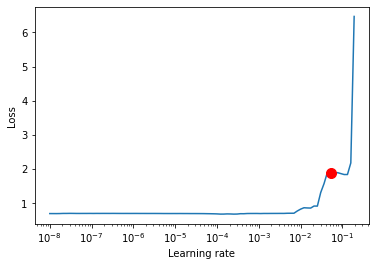

In [8]:
%%time
fig = lr_finder.plot(suggest=True)
fig.show()

In [9]:
new_lr = lr_finder.suggestion()
model.hparams.lr = new_lr

In [10]:
%reload_ext tensorboard
%tensorboard --logdir lightning_logs

C:\Users\ajgal\anaconda3\envs\BERT\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2021/11/29 11:52:46 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of pytorch. If you encounter errors during autologging, try upgrading / downgrading pytorch to a supported version, or try upgrading MLflow.
C:\Users\ajgal\anaconda3\envs\BERT\lib\site-packages\pytorch_lightning\core\datamodule.py:423: LightningDeprecationWarning: DataModule.prepare_data has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.prepare_data.
  rank_zero_deprecation(
C:\Users\ajgal\anaconda3\envs\BERT\lib\site-packages\pytorch_l

Configuring Optimizer...


Validation sanity check: 0it [00:00, ?it/s]

Training: 90it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

C:\Users\ajgal\anaconda3\envs\BERT\lib\site-packages\pytorch_lightning\trainer\callback_hook.py:102: LightningDeprecationWarning: The signature of `Callback.on_train_epoch_end` has changed in v1.3. `outputs` parameter has been removed. Support for the old signature will be removed in v1.5
  warning_cache.deprecation(
C:\Users\ajgal\anaconda3\envs\BERT\lib\site-packages\pytorch_lightning\trainer\deprecated_api.py:25: LightningDeprecationWarning: `Trainer.running_sanity_check` has been renamed to `Trainer.sanity_checking` and will be removed in v1.5.
  rank_zero_deprecation(


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

C:\Users\ajgal\anaconda3\envs\BERT\lib\site-packages\pytorch_lightning\core\datamodule.py:423: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.teardown.
  rank_zero_deprecation(
2021/11/29 22:52:50 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\ajgal\anaconda3\envs\BERT\lib\site-packages\pytorch_lightning\core\memory.py:202: LightningDeprecationWarning: Argument `mode` in `ModelSummary` is deprecated in v1.4 and will be removed in v1.6. Use `max_depth=-1` to replicate `mode=full` behaviour."
2021/11/29 22:52:51 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during pytorch autologging: No module named 'torchvision'


Generating Predictions & Labels...
Reading .csv files...
Building Datasets...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Building Prediction Dataloader...


C:\Users\ajgal\anaconda3\envs\BERT\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, predict dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 3413it [00:00, ?it/s]

Generating Metrics...
Wall time: 11h 2min 29s


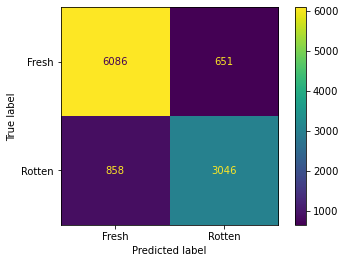

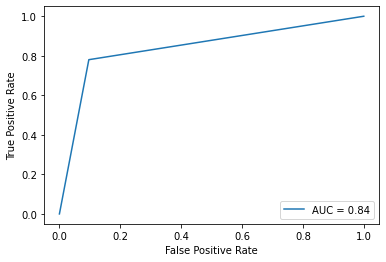

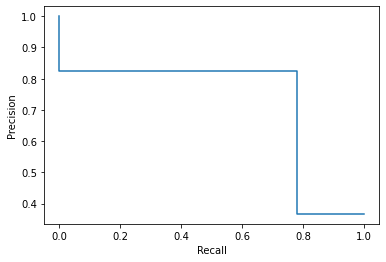

In [11]:
%%time
import mlflow
from mlflow.tracking import MlflowClient
from datetime import datetime
from utils.metric_utils import MetricUtils
import joblib

# preparing utils script
enc = joblib.load('class_encoder.pkl')
class_names = enc.classes_.tolist()
mut = MetricUtils()

# preparing mlflow run
run_name = 'dBERT_' + str(datetime.now())
experiment_id = mlflow.set_experiment("dBERT_Lightning")

mlflow.pytorch.autolog() #autologger for pytorch
with mlflow.start_run(run_name=run_name,experiment_id=experiment_id) as run:
    trainer.fit(model=model, datamodule=dm)
    pred_metrics = mut.prediction_metrics(trainer, model, dm, class_names)

In [12]:
from utils.mlflow_utils import print_auto_logged_info
print_auto_logged_info(mlflow.get_run(run_id=run.info.run_id))

run_id: 0cea629cd56c4592aa2b7520d082c2f8
artifacts: []
params: {'amsgrad': 'False', 'betas': '(0.9, 0.999)', 'epochs': '20', 'eps': '1e-08', 'lr': '3e-05', 'min_delta': '0.0', 'mode': 'max', 'monitor': 'Val Accuracy', 'optimizer_name': 'AdamW', 'patience': '5', 'stopped_epoch': '0', 'weight_decay': '0.01'}
metrics: {'accuracy': 0.8581900197349873, 'f1_score': 0.8014734903302198, 'precision_macro': 0.8501756857908205, 'precision_micro': 0.8581900197349873, 'recall_macro': 0.8417974310572639, 'recall_micro': 0.8581900197349873, 'roc_auc': 0.841797431057264, 'Train Accuracy': 0.9942855834960938, 'Train Loss': 0.0170464888215065, 'Val Accuracy': 0.8581900000572205, 'Val Loss': 0.7505690455436707}
tags: {'Mode': 'training'}


In [13]:
# Saving the Model
torch.save(model.state_dict(), params[4][save_dir])